## Lead Scoring Case Study
With 35 predictor variables we need to predict whether a particular lead will get converted into a customer.

**Overview**<br>
Leads data set contains ~ 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

The steps are broadly:
1. Read and understand the data
2. Clean and preparing the data (includes univariate analysis of categorical and numberical columns)
3. Test Train Split and Standardizing the data for modelling
4. Modelling
5. Final analysis and recommendations

### Step 1: Importing And Reading The Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing standard libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing datasets
leads = pd.read_csv("Leads.csv")

In [4]:
# Let's see the head of our dataset
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Let's check the dimensions of the dataframe
leads.shape

(9240, 37)

In [6]:
# let's look at the statistical aspects of the dataframe
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Let's see the type of each column
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Step 2: Cleaning And Preparing The Data

In [8]:
len(leads['Prospect ID'].unique()) 

9240

In [9]:
len(leads['Lead Number'].unique()) 

9240

In [10]:
# dropping Prospect ID & Lead Number since they have all unique values

leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)

In [11]:
#Converting 'Select' values to NaN as this shows that the user has not selected any of the options.

leads = leads.replace('Select', np.nan)

In [12]:
# checking % of missing values in each column
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

##### We have observed there were many missing values in this data frame hence dropped all columns from data frame for which missing values % is more than 45%

In [13]:
columns = leads.columns
percent_missing = leads.isnull().mean() * 100 
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})
missing_drop = list(missing_value_df[missing_value_df.percent_missing>45].column_name)
leads.drop(missing_drop, axis=1,inplace=True)

In [14]:
# checking % of missing values in each column
round(100*(leads.isnull().sum())/len(leads), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

#### Converting some binary variables (Yes/No) to 0/1

In [15]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
           'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the leads list
leads[varlist] = leads[varlist].apply(binary_map)

In [16]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,...,0,0,0,Interested in other courses,0,0,NaN,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,...,0,0,0,Ringing,0,0,NaN,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,...,0,0,0,Will revert after reading the email,0,0,Mumbai,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,...,0,0,0,Ringing,0,0,Mumbai,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,...,0,0,0,Will revert after reading the email,0,0,Mumbai,0,0,Modified


#### Categorical Variable Univariate Analysis 

In [17]:
#checking value counts of Country column

leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

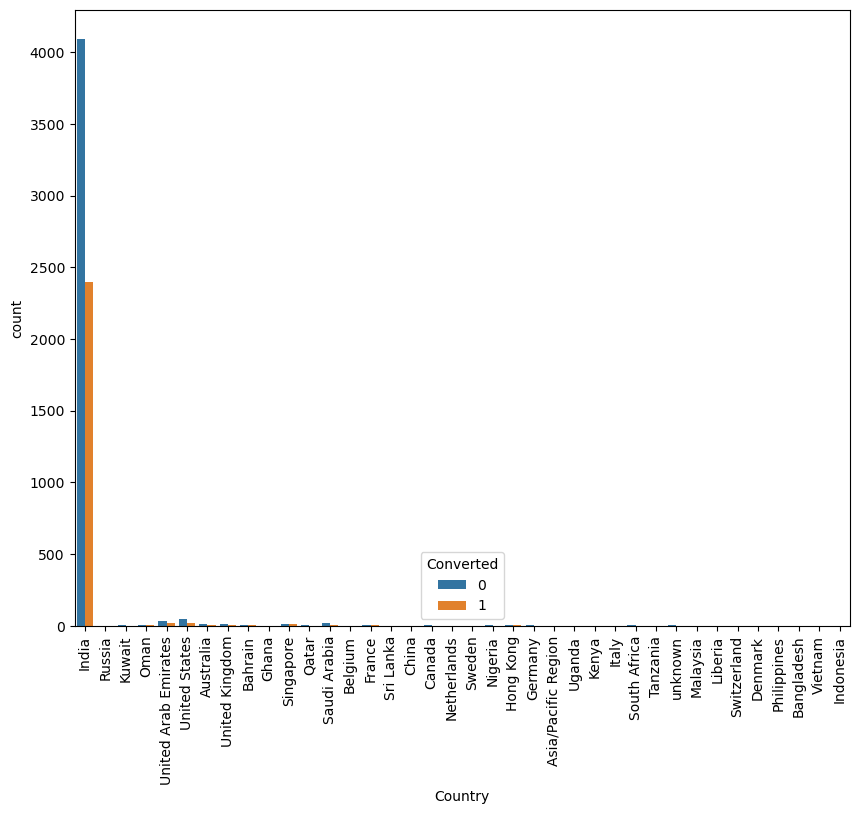

In [18]:
# plotting data of Country columnn for further analysis  
plt.figure(figsize=(10,8))
s1=sns.countplot(leads.Country, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [19]:
# As > 50% of data points have country mapped as India, mapping the null values in country column to India 
leads['Country'] = leads['Country'].replace(np.nan,'India')

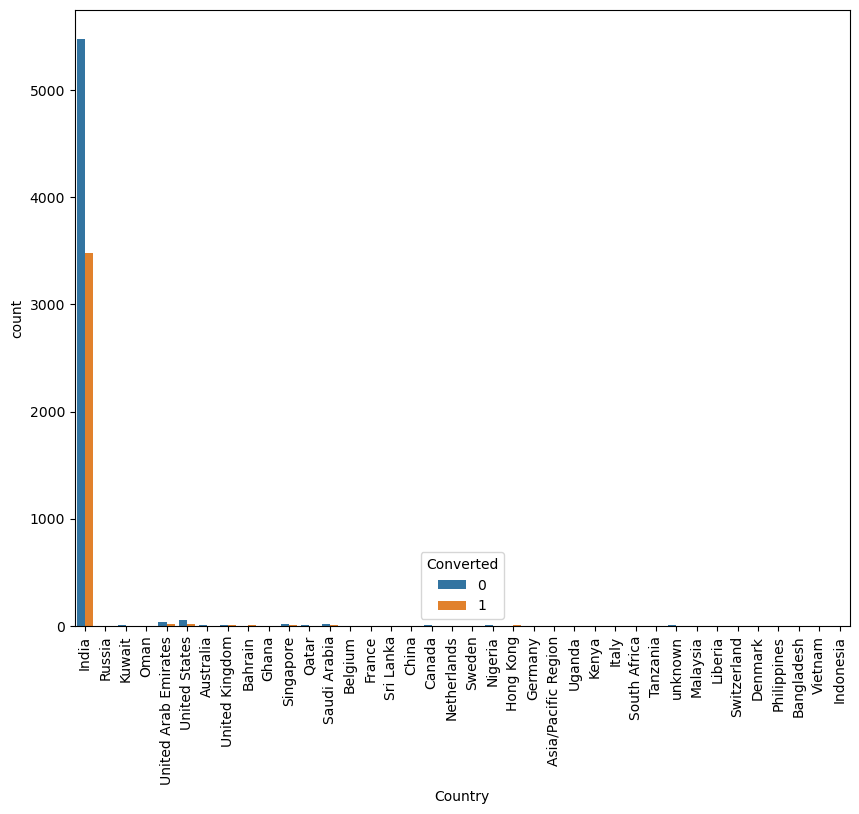

In [20]:
# plotting data of Country columnn for further analysis  
plt.figure(figsize=(10,8))
s1=sns.countplot(leads.Country, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [21]:
#leads['Country'].value_counts()
round(100*(leads['Country'].value_counts())/len(leads['Country']), 2)

India                   96.89
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Hong Kong                0.08
Bahrain                  0.08
Oman                     0.06
France                   0.06
unknown                  0.05
South Africa             0.04
Nigeria                  0.04
Germany                  0.04
Kuwait                   0.04
Canada                   0.04
Sweden                   0.03
China                    0.02
Asia/Pacific Region      0.02
Uganda                   0.02
Bangladesh               0.02
Italy                    0.02
Belgium                  0.02
Netherlands              0.02
Ghana                    0.02
Philippines              0.02
Russia                   0.01
Switzerland              0.01
Vietnam                  0.01
Denmark                  0.01
Tanzania                 0.01
Liberia   

In [22]:
# Since almost 97% of the data in Country column is represented by India, we can drop this column as this will not give any insights 
#creating a list of columns to be droppped

col_to_drop=['Country']

In [23]:
#checking value counts of City column

leads['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [24]:
# As mumbai represents city in most of the data points replacing null value in City column with mumbai
leads['City'] = leads['City'].replace(np.nan,'Mumbai')

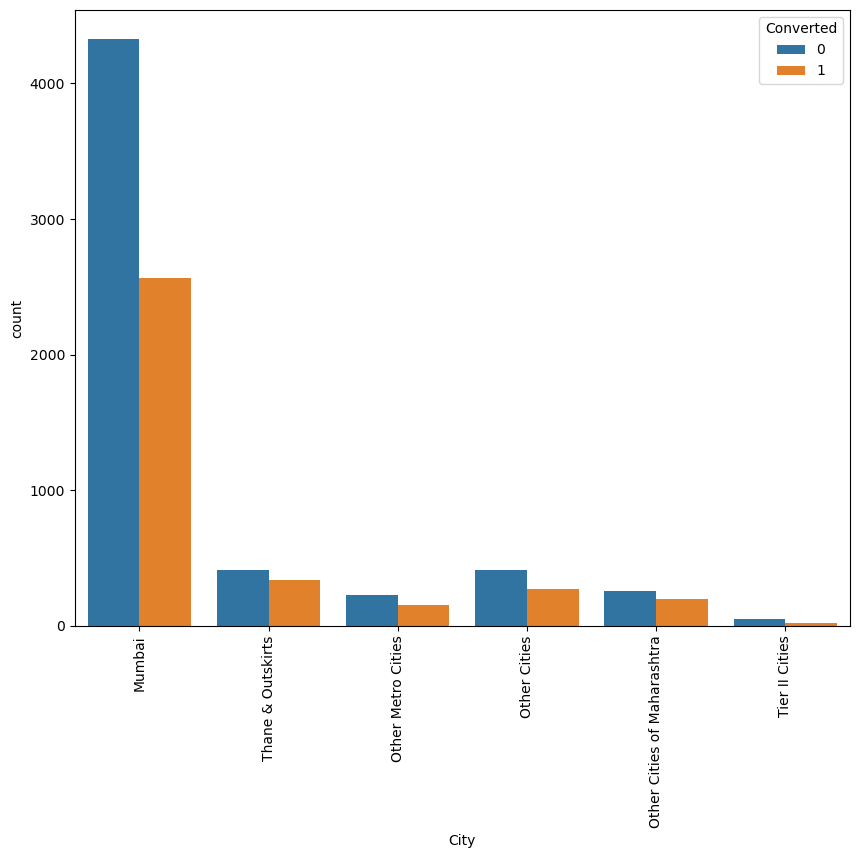

In [25]:
# plotting data of City columnn for further analysis  
plt.figure(figsize=(10,8))
s1=sns.countplot(leads.City, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [26]:
#checking value counts of Specialization column

leads['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [27]:
leads['Specialization'].isnull().sum()

3380

As there are a lot of entries with Null values we can specify that as Not Mentioned as the leads may not have selected any option because either the specialization was not listed and/or they could be students who do not have any specialization yet

In [28]:
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not Specified')

In [29]:
leads['Specialization'].value_counts()

Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

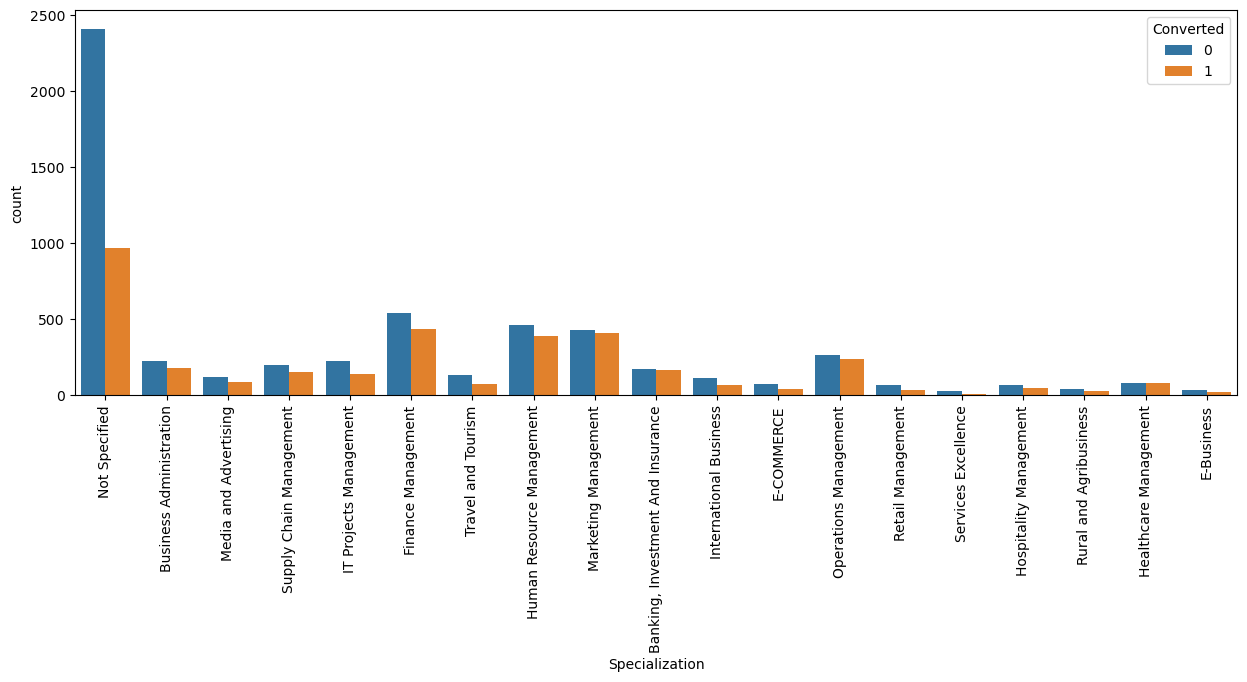

In [30]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


In [31]:
# Combining all the management related specialization as 'Management' 

leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

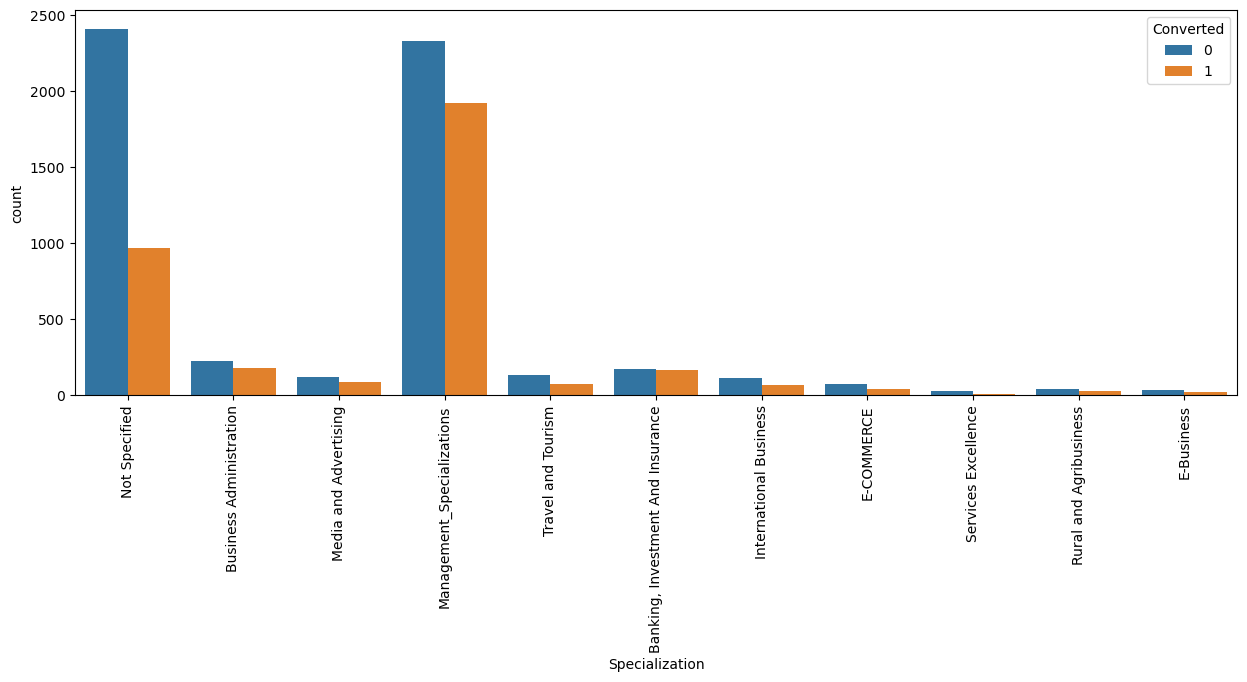

In [32]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


In [33]:
#checking value counts of Occupation column

leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [34]:
#imputing Null values with mode "Unemployed"
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

In [35]:
leads['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

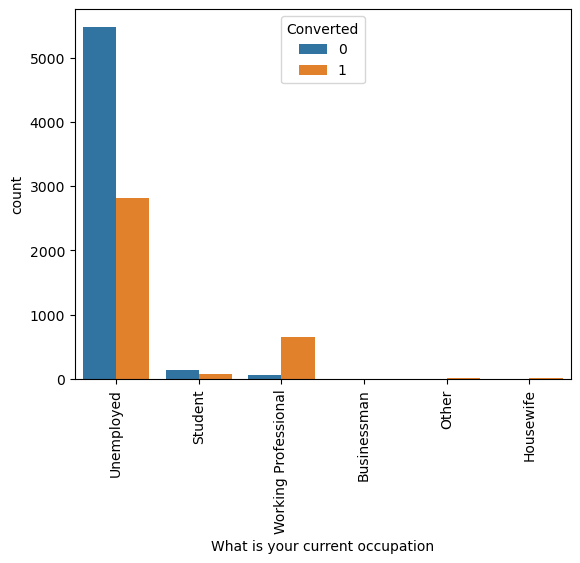

In [36]:
#visualizing count of Variable based on Converted value

s1=sns.countplot(leads['What is your current occupation'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

* Working Professionals inquiring for the course have high chances of joining it.
* Most of the leads inquiring about the course are Unemployed

In [37]:
#checking value counts of 'What matters most to you in choosing a course' column

leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [38]:
#imputing Null values with mode "Better Career Prospects"

leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

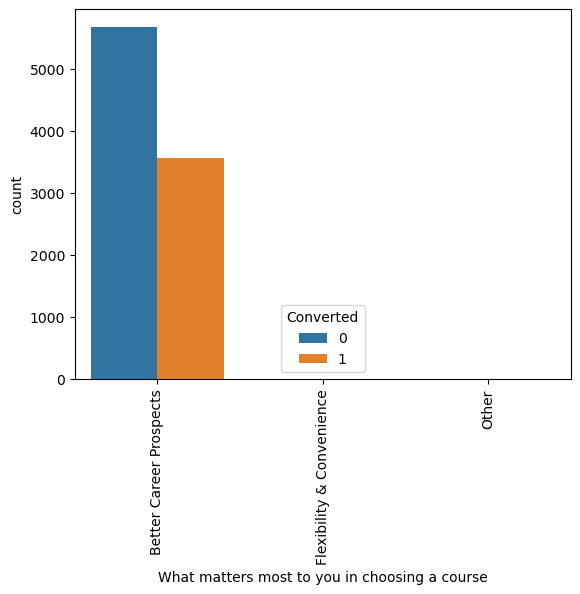

In [39]:
# visualizing count of Variable based on Converted value

s1=sns.countplot(leads['What matters most to you in choosing a course'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [40]:
# As 'Better Career Prospects' represents most of the data, we will drop this column due to lack of actionable insights that this column will give

leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [41]:
col_to_drop.append('What matters most to you in choosing a course')
col_to_drop

['Country', 'What matters most to you in choosing a course']

In [42]:
#checking value counts of 'Tags' column

leads['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [43]:
# replacing Nan values with "Not Specified"

leads['Tags'] = leads['Tags'].replace(np.nan,'Not Specified')

In [44]:
#checking value counts of 'Tags' column

leads['Tags'].value_counts()

Not Specified                                        3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

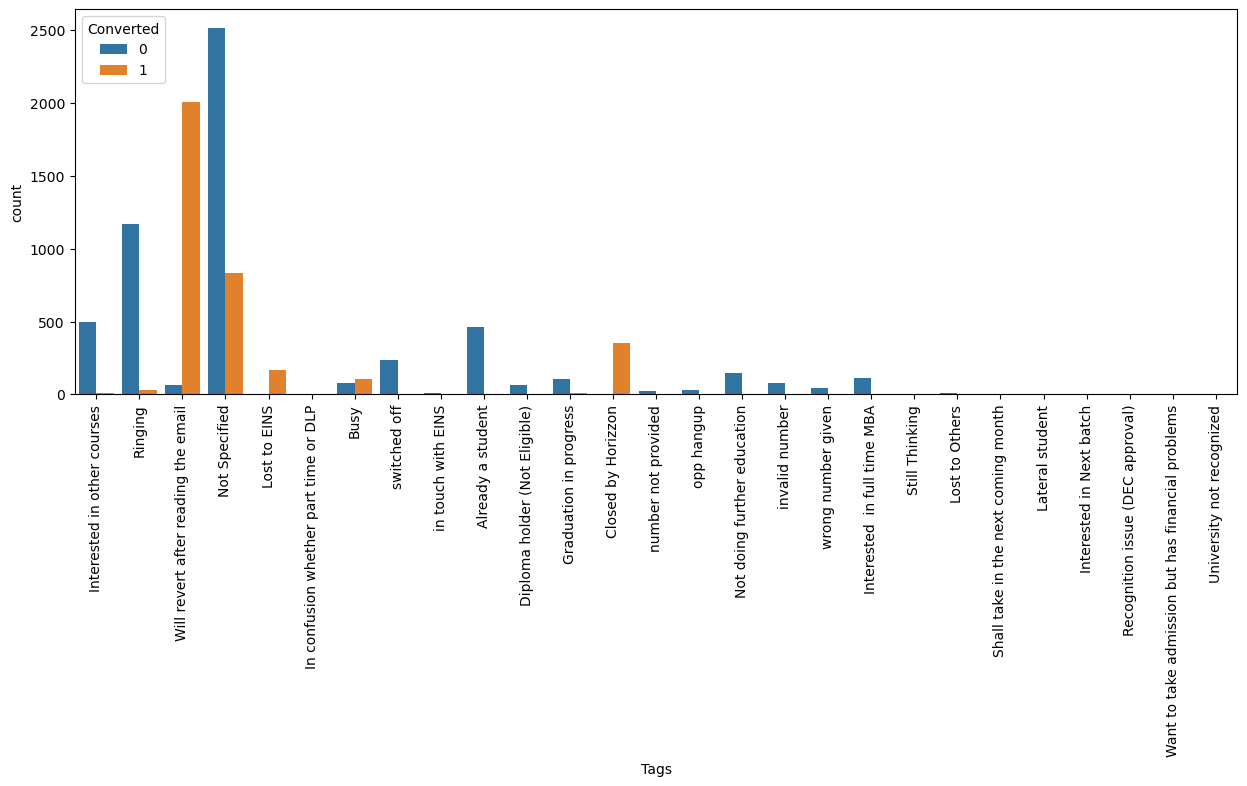

In [45]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Tags'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [46]:
# combining tags with low count as "Other Tags"
leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',                              'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off','Already a student','Not doing further education',
                                    'invalid number','wrong number given','Interested  in full time MBA'], 'Other_Tags')

In [47]:
#checking percentage of missing values after all the data cleanup
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [48]:
#checking value counts of Lead Source column
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [49]:
#replacing Nan Values and combining low frequency values
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat','Press_Release','Social Media'] ,'Others')

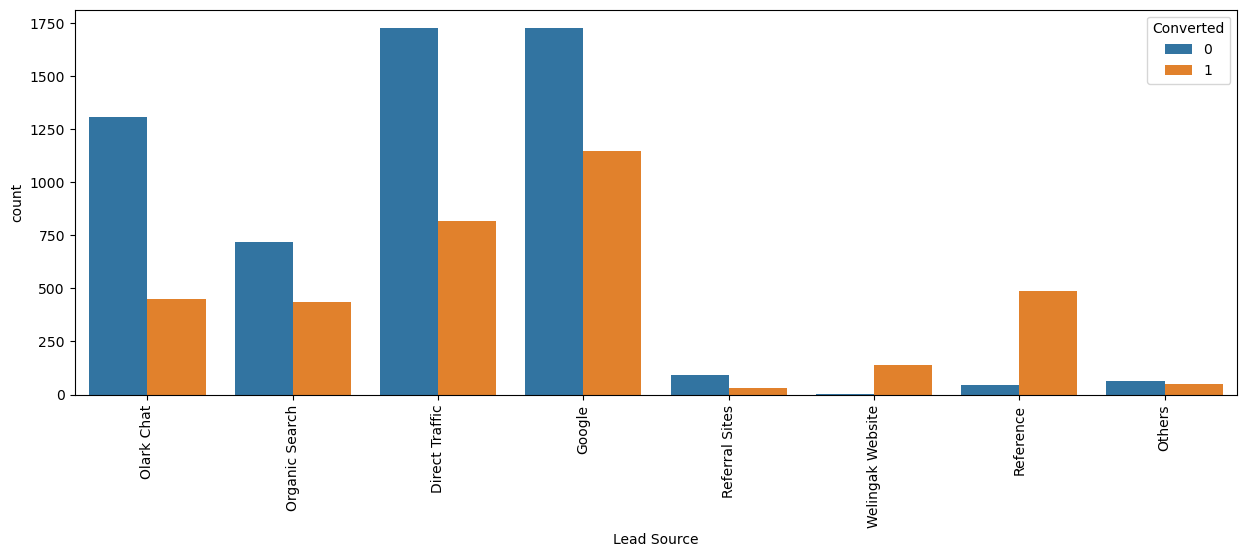

In [50]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Lead Source'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

* Maximum number of leads are identified by Google and Direct traffic.
* Conversion Rate of reference leads and leads through welingak website is high.
* To improve overall lead conversion rate, X education should focus on conversion rate of olark chat, organic search as these are generating high number of leads but they are not getting converted 

In [51]:
#checking value counts of Lead Source column
leads['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [52]:
#replacing Nan Values and combining low frequency values
leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Others')
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                        'Visited Booth in Tradeshow'],'Others')

In [53]:
leads['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [54]:
#Check the Null Values % in All Columns:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [55]:
# Drop all rows which have Nan Values. Since the number of dropped records is less than 2%, it will not affect the model
leads = leads.dropna()

In [56]:
#checking value counts of Lead Origin column
leads['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

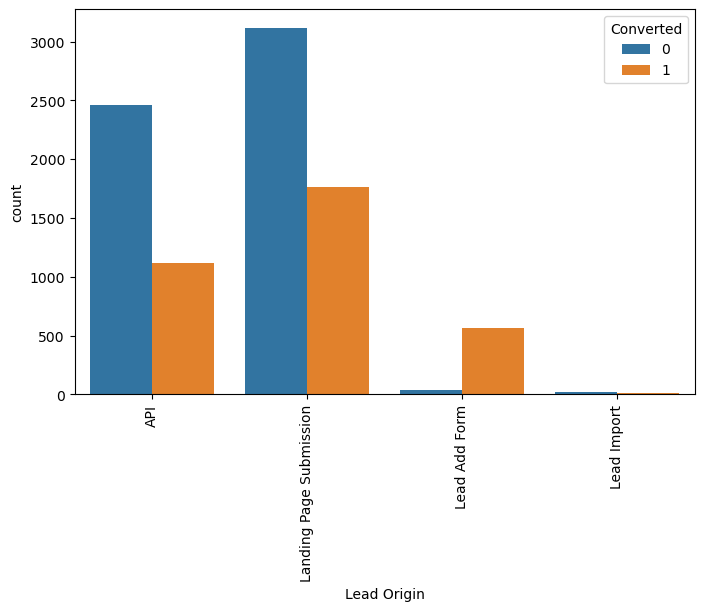

In [57]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Lead Origin'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Inference
* API and Landing Page Submission generate higher number of leads and many leads do get converted as well.
* Lead Add Form has a very good conversion rate but number of leads generated is not very high.
* Lead Import and Quick Add Form generate very few leads.
* In order to improve overall lead conversion rate, X education should target to improve lead conversion of API and Landing Page Submission origin and should try to generate more leads from Lead Add Form.

In [58]:
#checking value counts of Do Not Call column
leads['Do Not Call'].value_counts(dropna=False)

0    9101
1       2
Name: Do Not Call, dtype: int64

In [59]:
# As most of the records in this column have value as 0, we can drop this column 
col_to_drop.append('Do Not Call')
col_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [60]:
#checking value counts for Do Not Email
leads['Do Not Email'].value_counts(dropna=False)

0    8379
1     724
Name: Do Not Email, dtype: int64

In [61]:
# We can drop those variables for which there is a imbalance in data

leads['Search'].value_counts(dropna=False)

0    9089
1      14
Name: Search, dtype: int64

In [62]:
leads['Magazine'].value_counts(dropna=False)

0    9103
Name: Magazine, dtype: int64

In [63]:
leads['Newspaper Article'].value_counts(dropna=False)

0    9101
1       2
Name: Newspaper Article, dtype: int64

In [64]:
leads['X Education Forums'].value_counts(dropna=False)

0    9102
1       1
Name: X Education Forums, dtype: int64

In [65]:
leads['Newspaper'].value_counts(dropna=False)

0    9102
1       1
Name: Newspaper, dtype: int64

In [66]:
leads['Digital Advertisement'].value_counts(dropna=False)

0    9099
1       4
Name: Digital Advertisement, dtype: int64

In [67]:
leads['Through Recommendations'].value_counts(dropna=False)

0    9096
1       7
Name: Through Recommendations, dtype: int64

In [68]:
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

0    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [69]:
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

0    9103
Name: Update me on Supply Chain Content, dtype: int64

In [70]:
leads['Get updates on DM Content'].value_counts(dropna=False)

0    9103
Name: Get updates on DM Content, dtype: int64

In [71]:
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

0    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [72]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

0    6215
1    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [73]:
col_to_drop.extend(['Do Not Email','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])
col_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Do Not Email',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [74]:
#checking value counts of last Notable Activity
leads['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [75]:
#clubbing lower frequency values

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Activity')

In [76]:
leads['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Activity              160
Name: Last Notable Activity, dtype: int64

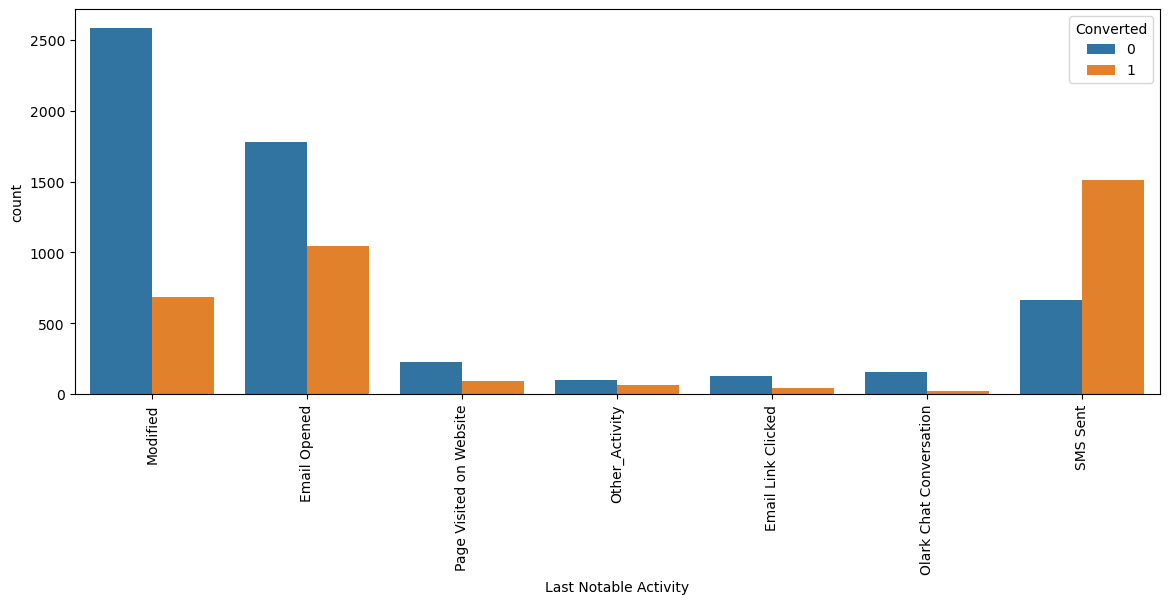

In [77]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [78]:
col_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Do Not Email',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [79]:
# Dropping unwanted columns which do not provide any significant insights 
leads = leads.drop(col_to_drop,1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Converted                               9103 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9103 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9103 non-null   object 
 7   Specialization                          9103 non-null   object 
 8   What is your current occupation         9103 non-null   object 
 9   Tags                                    9103 non-null   object 
 10  City                                    9103 non-null   obje

#### Analysis of numerical attributes

In [80]:
# Conversion rate

CR = sum(leads['Converted'])/len(leads['Converted'])*100
CR

38.02043282434362

Conversion rate is around 38%

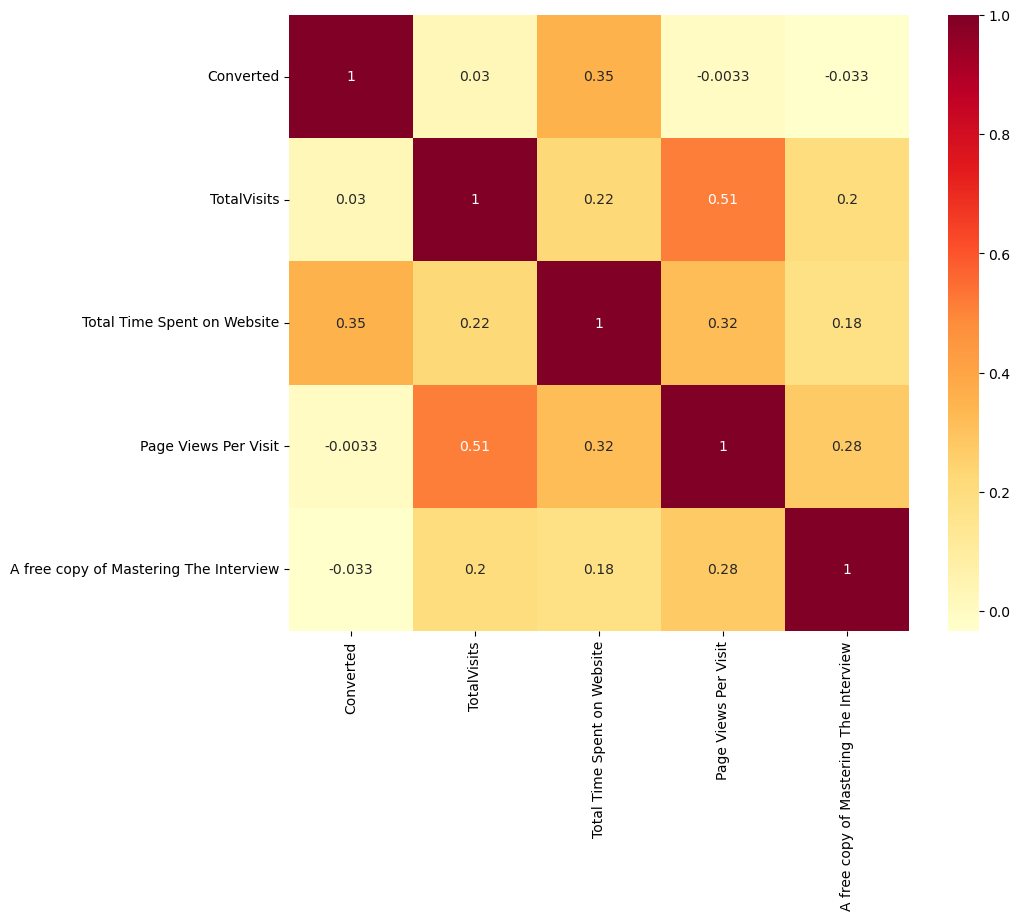

In [81]:
# Checking correlation between numerical variables

plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads.corr(), cmap="YlOrRd", annot=True)
plt.show()

####  Numerical Variable Univariate Analysis 

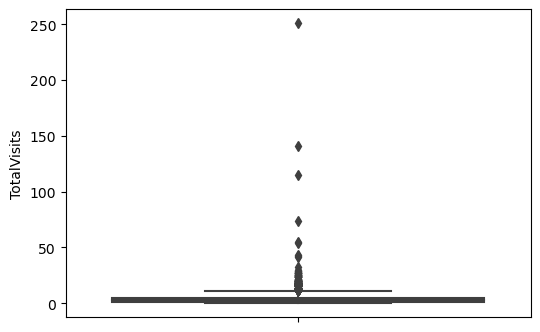

In [82]:
# Total Visits
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

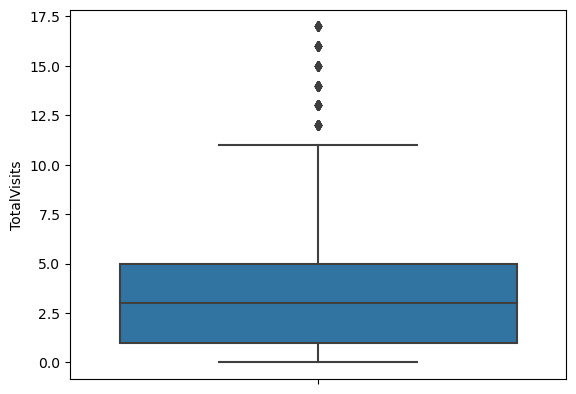

In [83]:
# Remove top & bottom 1% of Outlier values

Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

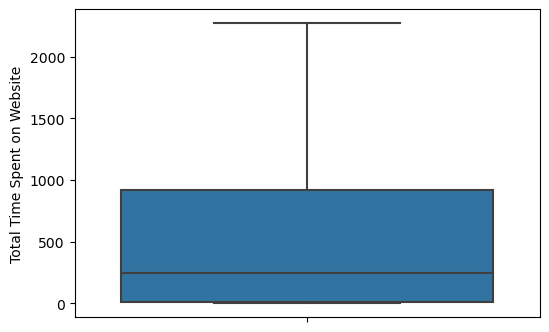

In [84]:
# Total Time Spent on Website
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

As there are no major outliers, we will skip this column

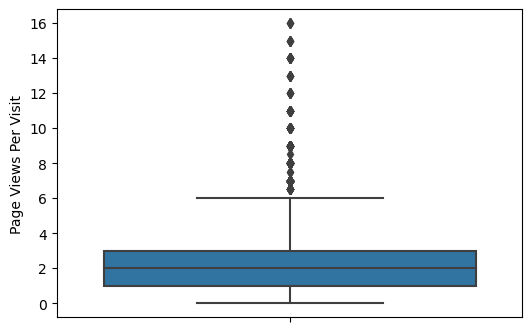

In [86]:
# Page Views Per Visit

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

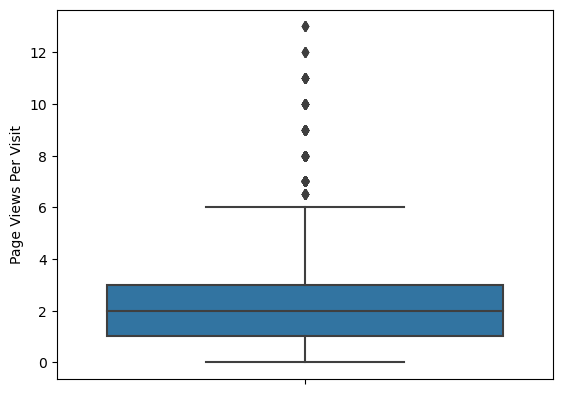

In [87]:
# Remove top & bottom 1% of Outlier values

Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

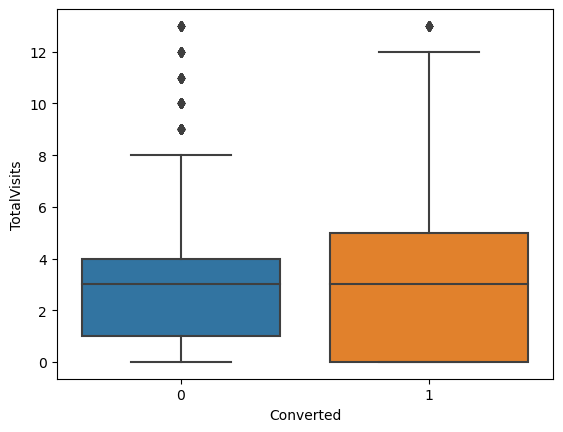

In [88]:
# checking "Total Visits" vs "Converted" variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

* Median for both Converted and Not Converted leads is approximately equal
* We cannot derive any strong inference basis this column alone

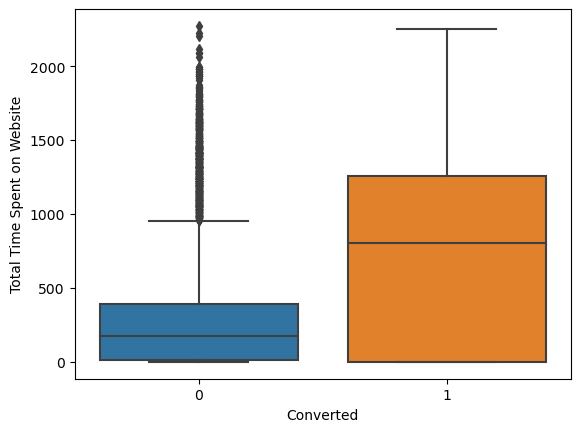

In [89]:
# checking "Total Time Spent on Website" vs "Converted" variable
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.show()

* Leads who spend more time on the website are more likely to get converted 

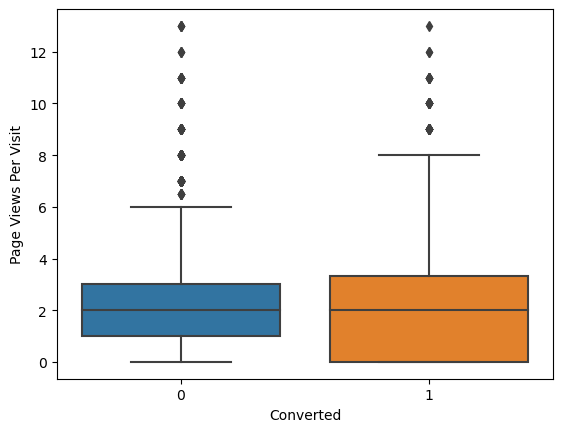

In [90]:
# checking "Total Time Spent on Website" vs "Converted" variable
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.show()

* Median for both Converted and Not Converted leads is approximately equal
* We cannot dra any strong inference basis this column alone

#### Creating Dummy Variables For Categorical variables with multiple levels 

In [91]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8929 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8929 non-null   object 
 1   Lead Source                             8929 non-null   object 
 2   Converted                               8929 non-null   int64  
 3   TotalVisits                             8929 non-null   float64
 4   Total Time Spent on Website             8929 non-null   int64  
 5   Page Views Per Visit                    8929 non-null   float64
 6   Last Activity                           8929 non-null   object 
 7   Specialization                          8929 non-null   object 
 8   What is your current occupation         8929 non-null   object 
 9   Tags                                    8929 non-null   object 
 10  City                                    8929 non-null   obje

In [92]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity','Specialization','What is your current occupation','Tags','City',
                               'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)

In [93]:
categorical_cols = leads[['Lead Origin', 'Lead Source', 'Last Activity','Specialization','What is your current occupation','Tags','City',
                               'Last Notable Activity']]
leads.drop(categorical_cols,axis=1,inplace=True)

leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


### Step 3 : Train-Test Split And Standardizing The Data For Modelling

In [94]:
# Import libraries
from sklearn.model_selection import train_test_split

In [95]:
# Defining X and y
y = leads['Converted']

X=leads.drop('Converted', axis=1)

In [96]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [97]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6250 entries, 7954 to 5844
Data columns (total 55 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6250 non-null   float64
 1   Total Time Spent on Website                           6250 non-null   int64  
 2   Page Views Per Visit                                  6250 non-null   float64
 3   A free copy of Mastering The Interview                6250 non-null   int64  
 4   Lead Origin_Landing Page Submission                   6250 non-null   uint8  
 5   Lead Origin_Lead Add Form                             6250 non-null   uint8  
 6   Lead Origin_Lead Import                               6250 non-null   uint8  
 7   Lead Source_Google                                    6250 non-null   uint8  
 8   Lead Source_Olark Chat                                6

#### Scaling the data 

In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7954,-0.029201,-0.620143,0.343801,-0.672161,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1544,1.063638,-0.363941,1.834249,-0.672161,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
558,-0.757760,1.512418,-0.649832,-0.672161,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
6436,-1.122040,-0.874502,-1.146648,-0.672161,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
890,1.427918,2.373184,2.331065,-0.672161,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


### Step 4: Model Building*

In [102]:
# Model Building using Stats Model & RFE:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [106]:
lgr = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(estimator = lgr,n_features_to_select= 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [107]:
rfe.support_

array([False,  True, False, False, False,  True, False, False,  True,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True, False,  True,  True,  True, False,
       False, False, False, False, False,  True, False, False, False,
        True])

In [108]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 22),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('A free copy of Mastering The Interview', False, 33),
 ('Lead Origin_Landing Page Submission', False, 5),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 21),
 ('Lead Source_Google', False, 37),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 29),
 ('Lead Source_Others', False, 12),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 27),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 15),
 ('Last Activity_Email Opened', False, 9),
 ('Last Activity_Form Submitted on Website', False, 7),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', False, 16),
 ('Last Activity_Page Visited on Website', False, 41),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', 

In [109]:
#list of RFE supported columns
cols = X_train.columns[rfe.support_]
cols

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [110]:
# BUILDING MODEL :1

X_train_sm = sm.add_constant(X_train[cols])
lgr_m1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lgr_m1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6250
Model:                            GLM   Df Residuals:                     6234
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1240.9
Date:                Thu, 14 Sep 2023   Deviance:                       2481.9
Time:                        23:19:03   Pearson chi2:                 9.09e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6075
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.6180      0.097    -16.723      0.000      -1.808      -1.428
Total Time Spent on Website                  1.0374      0.061     16.956      0.000       0.917       1.157
Lead Origin_Lead Add Form                    2.0130      0.437      4.605      0.000       1.156       2.870
Lead Source_Olark Chat                       1.2723      0.147      8.670      0.000       0.985       1.560
Lead Source_Welingak Website                 3.9687      1.108      3.582      0.000       1.797       6.141
Last Activity_Email Bounced                 -1.2410      0.518     -2.394      0.017      -2.257      -0.225
Last Activity_Olark Chat Conversation       -0.9909      0.235     -4.212      0.000      -1.452      -0.530
Last Activity_SMS Sent                       1.0742      0.233      4.610      0.000       0.617       1.531
Tags_Closed by Horizzon                     26.9024   1.37e+04      0.002      0.998   -2.67e+04    2.68e+04
Tags_Interested in other courses            -2.0096      0.396     -5.070      0.000      -2.786      -1.233
Tags_Lost to EINS                            5.3623      0.604      8.871      0.000       4.178       6.547
Tags_Other_Tags                             -2.7545      0.228    -12.106      0.000      -3.201      -2.309
Tags_Ringing                                -3.4302      0.231    -14.854      0.000      -3.883      -2.978
Tags_Will revert after reading the email     4.5056      0.196     23.016      0.000       4.122       4.889
Last Notable Activity_Modified              -1.0498      0.163     -6.442      0.000      -1.369      -0.730
Last Notable Activity_SMS Sent               1.1136      0.263      4.232      0.000       0.598       1.629
============================================================================================================
"""

p-value of variable Tags_Closed by Horizzon is very high, so we can drop it.

In [111]:
# dropping columns with high p-value

cols = cols.drop('Tags_Closed by Horizzon',1)

In [112]:
cols

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [113]:
# BUILDING MODEL :2

X_train_sm = sm.add_constant(X_train[cols])
lgr_m2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lgr_m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6250
Model:                            GLM   Df Residuals:                     6235
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1417.3
Date:                Thu, 14 Sep 2023   Deviance:                       2834.6
Time:                        23:19:58   Pearson chi2:                 1.19e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5848
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3392      0.088    -15.185      0.000      -1.512      -1.166
Total Time Spent on Website                  1.0940      0.058     18.880      0.000       0.980       1.208
Lead Origin_Lead Add Form                    4.2496      0.287     14.791      0.000       3.686       4.813
Lead Source_Olark Chat                       1.1025      0.138      7.993      0.000       0.832       1.373
Lead Source_Welingak Website                 1.9522      1.051      1.858      0.063      -0.107       4.012
Last Activity_Email Bounced                 -1.4638      0.437     -3.347      0.001      -2.321      -0.607
Last Activity_Olark Chat Conversation       -1.2571      0.212     -5.930      0.000      -1.673      -0.842
Last Activity_SMS Sent                       0.4382      0.203      2.156      0.031       0.040       0.837
Tags_Interested in other courses            -2.5524      0.389     -6.559      0.000      -3.315      -1.790
Tags_Lost to EINS                            4.7869      0.600      7.979      0.000       3.611       5.963
Tags_Other_Tags                             -3.0608      0.226    -13.530      0.000      -3.504      -2.617
Tags_Ringing                                -3.8269      0.239    -15.988      0.000      -4.296      -3.358
Tags_Will revert after reading the email     4.0461      0.187     21.601      0.000       3.679       4.413
Last Notable Activity_Modified              -0.4696      0.132     -3.550      0.000      -0.729      -0.210
Last Notable Activity_SMS Sent               1.5559      0.239      6.516      0.000       1.088       2.024
============================================================================================================
"""

In [114]:
# dropping columns with high p-value

cols = cols.drop('Lead Source_Welingak Website',1)

In [115]:
# BUILDING MODEL :3

X_train_sm = sm.add_constant(X_train[cols])
lgr_m3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lgr_m3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6250
Model:                            GLM   Df Residuals:                     6236
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1420.2
Date:                Thu, 14 Sep 2023   Deviance:                       2840.5
Time:                        23:20:30   Pearson chi2:                 1.33e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5844
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3339      0.088    -15.150      0.000      -1.507      -1.161
Total Time Spent on Website                  1.0962      0.058     18.875      0.000       0.982       1.210
Lead Origin_Lead Add Form                    4.5422      0.267     17.003      0.000       4.019       5.066
Lead Source_Olark Chat                       1.1010      0.138      7.978      0.000       0.831       1.372
Last Activity_Email Bounced                 -1.4115      0.427     -3.309      0.001      -2.247      -0.575
Last Activity_Olark Chat Conversation       -1.2418      0.211     -5.877      0.000      -1.656      -0.828
Last Activity_SMS Sent                       0.4671      0.202      2.313      0.021       0.071       0.863
Tags_Interested in other courses            -2.5702      0.391     -6.574      0.000      -3.336      -1.804
Tags_Lost to EINS                            4.7885      0.600      7.980      0.000       3.612       5.965
Tags_Other_Tags                             -3.0776      0.227    -13.570      0.000      -3.522      -2.633
Tags_Ringing                                -3.8773      0.241    -16.057      0.000      -4.351      -3.404
Tags_Will revert after reading the email     4.0420      0.187     21.569      0.000       3.675       4.409
Last Notable Activity_Modified              -0.4889      0.132     -3.702      0.000      -0.748      -0.230
Last Notable Activity_SMS Sent               1.5286      0.238      6.435      0.000       1.063       1.994
============================================================================================================
"""

Since the p-values for all variables are less, we can check the VIF to see if there is any correlation between the variables

In [116]:
# Check for the VIF values 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [117]:
# Create a dataframe that will contain the names of all the variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_SMS Sent,6.69
5,Last Activity_SMS Sent,6.61
11,Last Notable Activity_Modified,2.22
4,Last Activity_Olark Chat Conversation,1.65
2,Lead Source_Olark Chat,1.64
10,Tags_Will revert after reading the email,1.52
0,Total Time Spent on Website,1.41
1,Lead Origin_Lead Add Form,1.25
8,Tags_Other_Tags,1.17
6,Tags_Interested in other courses,1.14


As we can see that Last Notable Activity_SMS Sent has high VIF, i.e. it is highly correlated to other feature variables, we can drop it 

In [118]:
# dropping variable with high VIF

cols = cols.drop('Last Notable Activity_SMS Sent',1)

In [119]:
#BUILDING MODEL :4
X_train_sm = sm.add_constant(X_train[cols])
lgr_m4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lgr_m4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6250
Model:                            GLM   Df Residuals:                     6237
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1441.7
Date:                Thu, 14 Sep 2023   Deviance:                       2883.4
Time:                        23:21:59   Pearson chi2:                 1.20e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5815
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.2164      0.084    -14.398      0.000      -1.382      -1.051
Total Time Spent on Website                  1.1049      0.058     19.144      0.000       0.992       1.218
Lead Origin_Lead Add Form                    4.6101      0.265     17.379      0.000       4.090       5.130
Lead Source_Olark Chat                       1.1151      0.136      8.207      0.000       0.849       1.381
Last Activity_Email Bounced                 -1.1548      0.431     -2.682      0.007      -1.999      -0.311
Last Activity_Olark Chat Conversation       -1.0285      0.209     -4.911      0.000      -1.439      -0.618
Last Activity_SMS Sent                       1.5583      0.107     14.512      0.000       1.348       1.769
Tags_Interested in other courses            -2.4779      0.393     -6.309      0.000      -3.248      -1.708
Tags_Lost to EINS                            4.9066      0.603      8.132      0.000       3.724       6.089
Tags_Other_Tags                             -3.0031      0.225    -13.364      0.000      -3.444      -2.563
Tags_Ringing                                -3.7072      0.236    -15.720      0.000      -4.169      -3.245
Tags_Will revert after reading the email     4.0947      0.189     21.683      0.000       3.725       4.465
Last Notable Activity_Modified              -0.9908      0.110     -8.971      0.000      -1.207      -0.774
============================================================================================================
"""

In [120]:
# Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_Modified,1.71
2,Lead Source_Olark Chat,1.63
4,Last Activity_Olark Chat Conversation,1.60
10,Tags_Will revert after reading the email,1.47
5,Last Activity_SMS Sent,1.46
0,Total Time Spent on Website,1.40
1,Lead Origin_Lead Add Form,1.25
8,Tags_Other_Tags,1.16
6,Tags_Interested in other courses,1.12
3,Last Activity_Email Bounced,1.11


As all variables have VIF < 5, we can proceed with deriving the probabilities of Lead Score on Train dataset

In [121]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:5]

7954    0.044939
1544    0.165405
558     0.369096
6436    0.002260
890     0.091004
dtype: float64

In [122]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.04493879, 0.16540543, 0.36909642, 0.0022602 , 0.09100375,
       0.98942428, 0.95378421, 0.10947356, 0.79630717, 0.0086539 ])

In [123]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.044939,7954
1,0,0.165405,1544
2,0,0.369096,558
3,0,0.002260,6436
4,0,0.091004,890


In [124]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.044939,7954,0
1,0,0.165405,1544,0
2,0,0.369096,558,0
3,0,0.002260,6436,0
4,0,0.091004,890,0


In [125]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3649  198]
 [ 363 2040]]


In [126]:
# check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.91024


In [127]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [128]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8489388264669163

In [129]:
# Let us calculate specificity
TN / float(TN+FP)

0.9485313231089161

In [130]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.05146867689108396


In [131]:
# positive predictive value 
print (TP / float(TP+FP))

0.9115281501340483


In [132]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9095214356929212


##### PLOTTING ROC CURVE

In [133]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [134]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

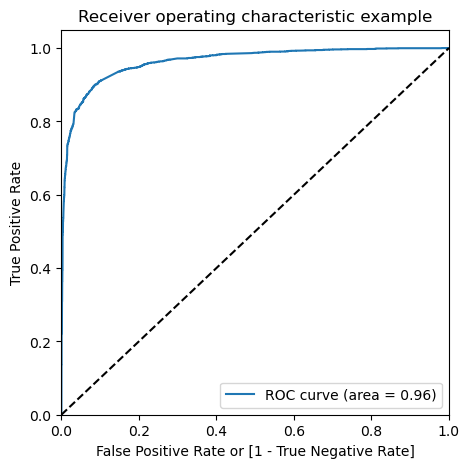

In [135]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The area under the ROC Curve should be a value close to 1. We are getting a good value of 0.96 indicating a good predictive model.

#### Finding Optimal Cutoff Point

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that:

In [136]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.044939,7954,0,1,0,0,0,0,0,0,0,0,0
1,0,0.165405,1544,0,1,1,0,0,0,0,0,0,0,0
2,0,0.369096,558,0,1,1,1,1,0,0,0,0,0,0
3,0,0.002260,6436,0,1,0,0,0,0,0,0,0,0,0
4,0,0.091004,890,0,1,0,0,0,0,0,0,0,0,0


In [137]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0   0.38448  1.000000  0.000000
0.1   0.1   0.78416  0.972950  0.666233
0.2   0.2   0.86880  0.944653  0.821419
0.3   0.3   0.90560  0.901789  0.907980
0.4   0.4   0.90960  0.875156  0.931115
0.5   0.5   0.91024  0.848939  0.948531
0.6   0.6   0.91120  0.827299  0.963608
0.7   0.7   0.89840  0.774449  0.975825
0.8   0.8   0.88944  0.737412  0.984403
0.9   0.9   0.86032  0.651685  0.990642


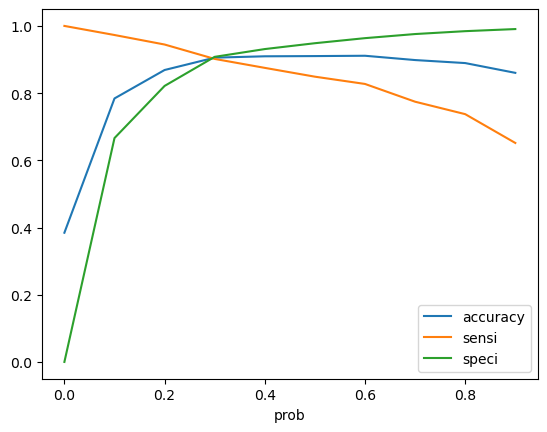

In [138]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [139]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.044939,7954,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.165405,1544,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.369096,558,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.002260,6436,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.091004,890,0,1,0,0,0,0,0,0,0,0,0,0


In [140]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map(lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.044939,7954,0,4
1,0,0.165405,1544,0,17
2,0,0.369096,558,1,37
3,0,0.002260,6436,0,0
4,0,0.091004,890,0,9


In [141]:
# Ensuring that the lead score is in range of 0-100

print("Minimum lead score is:",y_train_pred_final.Lead_Score.min())
print("Maximum lead score is:",y_train_pred_final.Lead_Score.max())

Minimum lead score is: 0
Maximum lead score is: 100


In [142]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9056

In [143]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3493,  354],
       [ 236, 2167]], dtype=int64)

In [144]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [145]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9017894298793175

In [146]:
# Let us calculate specificity
TN / float(TN+FP)

0.9079802443462438

Observation:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.96, which is good. We have the following values for the Train Data:

Accuracy : 90.56%
Sensitivity : 90.17%
Specificity : 90.79%

In [147]:
##### Precision
TP / TP + FP

confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.859579531931773

In [148]:
##### Recall
TP / TP + FN

confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.9017894298793175

In [149]:
from sklearn.metrics import precision_score, recall_score

In [150]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.859579531931773

In [151]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9017894298793175

In [152]:
from sklearn.metrics import precision_recall_curve

In [153]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

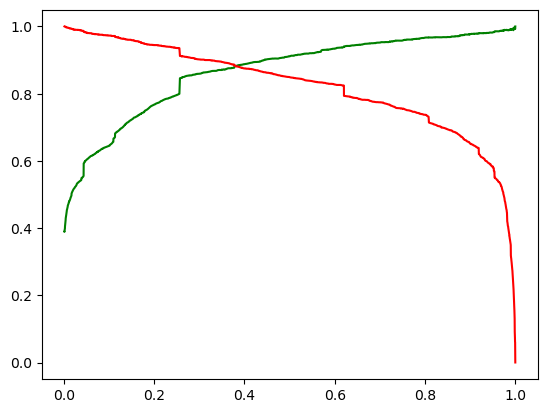

In [154]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [155]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
8707,1.427918,0.231407,0.010934,-0.672161,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
5299,1.063638,-0.774971,-0.153015,-0.672161,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3565,0.335079,1.195391,0.840617,-0.672161,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2905,0.699359,0.141091,1.337433,-0.672161,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
6669,1.427918,-0.830266,2.331065,1.487739,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [156]:
X_test = X_test[cols]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified
8707,0.231407,0,0,0,0,0,0,0,0,1,0,0
5299,-0.774971,0,0,0,0,1,0,0,0,0,0,0
3565,1.195391,0,0,0,0,0,0,0,1,0,0,0
2905,0.141091,0,0,0,0,0,0,0,0,1,0,0
6669,-0.830266,0,0,1,0,0,0,0,0,0,0,1


In [158]:
X_test_sm = sm.add_constant(X_test)

##### PREDICTIONS ON TEST SET

In [159]:
y_test_pred = res.predict(X_test_sm)

In [160]:
y_test_pred[:10]

8707    0.009304
5299    0.374170
3565    0.052218
2905    0.008428
6669    0.013661
4357    0.255861
6089    0.015734
1473    0.989107
5515    0.415999
3961    0.255861
dtype: float64

In [161]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [162]:
# Let's see the head
y_pred_1.head()

,0
8707,0.009304
5299,0.374170
3565,0.052218
2905,0.008428
6669,0.013661


In [163]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [164]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [165]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [166]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)


In [167]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,8707,0.009304
1,0,5299,0.374170
2,0,3565,0.052218
3,0,2905,0.008428
4,0,6669,0.013661


In [169]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [170]:
y_pred_final.head()


,Converted,Prospect ID,Converted_prob
0,0,8707,0.009304
1,0,5299,0.374170
2,0,3565,0.052218
3,0,2905,0.008428
4,0,6669,0.013661


In [171]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [172]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,8707,0,0.009304,1
1,5299,0,0.374170,37
2,3565,0,0.052218,5
3,2905,0,0.008428,1
4,6669,0,0.013661,1


In [173]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [174]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,8707,0,0.009304,1,0
1,5299,0,0.374170,37,1
2,3565,0,0.052218,5,0
3,2905,0,0.008428,1,0
4,6669,0,0.013661,1,0


In [175]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9029488615154908

In [176]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion3

array([[1519,  178],
       [  82,  900]], dtype=int64)

In [177]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [178]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9164969450101833

In [179]:
# Let us calculate specificity
TN / float(TN+FP)

0.8951090159104301

In [180]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8348794063079777

In [181]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9164969450101833

Observation:
After running the model on the Test Data these are the figures we obtain:

Accuracy : 92.78%
Sensitivity : 91.98%
Specificity : 93.26%

### Step 5 : Final Observation And Recommendation
Let us compare the values obtained for Train & Test:

* Train Data :
    * Accuracy : 90.56% 
    * Sensitivity : 90.17% 
    * Specificity : 90.79%
* Test Data : 
    * Accuracy : 90.29% 
    * Sensitivity : 91.64% 
    * Specificity : 89.51%